<!-- ---------------------------------------------------- --> 
  <div class="col-sm-6 col-md-6 col-lg-6">
	<!-- Pandas Tutorial -->  
	  <center>
	    <br>
        <h1>Part 2</h1>
        <br>
        <br>
	  </center>	
    <!-- Pandas Tutorial -->	
  </div>
<!-- ---------------------------------------------------- -->

**Get Data** - Our data set will consist of an Excel file containing customer counts per date. We will learn how to read in the excel file for processing.  
**Prepare Data** - The data is an irregular time series having duplicate dates. We will be challenged in compressing the data and coming up with next years forecasted customer count.  
**Analyze Data** - We use graphs to visualize trends and spot outliers. Some built in computational tools will be used to calculate next years forecasted customer count.  
**Present Data** - The results will be plotted.  

In [2]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy.random as np
import sys
import matplotlib

%matplotlib inline

> We will be creating our own test data for analysis.

In [3]:
# set seed
np.seed(111)

# Function to generate test data
def CreateDataSet(Number=1):
    
    Output = []
    
    for i in range(Number):
        
        # Create a weekly (mondays) date range
        rng = pd.date_range(start='1/1/2014', end='11/20/2017', freq='W-MON')
        #print len(rng)
        # Create random data
        data = np.randint(low=25,high=1000,size=len(rng))
        
        # Status pool 
        status = ["Apoxin","Symcodin","Lipsorol"]
        
        # Make a random list of statuses
        random_status = [status[np.randint(low=0,high=len(status))] for i in range(len(rng))]
        
        # State pool
        countries = ['BEL','deu','DEU','Aus','Ecu','jpn','NGA','PHL','ECU', 'BRA','JPN']
        
        # Make a random list of states 
        random_countries = [countries[np.randint(low=0,high=len(countries))] for i in range(len(rng))]
    
        Output.extend(zip(random_countries, random_status, data, rng))
        
    return Output

Now that we have a function to generate our test data, lets create some data and stick it into a dataframe.

In [4]:
dataset = CreateDataSet(10)
df = pd.DataFrame(data=dataset, columns=['Countries','Product','CustomerCount','StatusDate'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2030 entries, 0 to 2029
Data columns (total 4 columns):
Countries        2030 non-null object
Product          2030 non-null object
CustomerCount    2030 non-null int64
StatusDate       2030 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 63.5+ KB


In [5]:
df.describe()

,CustomerCount
count,2030.000000
mean,508.962562
std,284.021386
min,25.000000
25%,260.250000
50%,505.000000
75%,756.000000
max,999.000000


In [6]:
df.head() #GETTING First 5 rows

,Countries,Product,CustomerCount,StatusDate
0,DEU,Symcodin,877,2014-01-06
1,NGA,Lipsorol,901,2014-01-13
2,Aus,Apoxin,749,2014-01-20
3,BEL,Apoxin,111,2014-01-27
4,DEU,Apoxin,300,2014-02-03


We are now going to save this dataframe into an Excel file, to then bring it back to a dataframe. We simply do this to show you how to read and write to Excel files.  

We do not write the index values of the dataframe to the Excel file, since they are not meant to be part of our initial test data set.

In [7]:
# Save results to excel
df.to_excel('World-Wide-Sales.xlsx', index=False)
print('Done')

Done


<hr style="height:3px;border:none;color:#333;background-color:#333;" />

# Grab Data from Excel  

We will be using the ***read_excel*** function to read in data from an Excel file. The function allows you to read in specfic tabs by name or location.

In [8]:
pd.read_excel?

**Note: The location on the Excel file will be in the same folder as the notebook, unless specified otherwise.**

In [9]:
# Location of file
Location = r'World-Wide-Sales.xlsx'
# Parse a specific sheet
df = pd.read_excel(Location, 0, index_col='StatusDate')
df.dtypes

Countries        object
Product          object
CustomerCount     int64
dtype: object

In [10]:
df

,Countries,Product,CustomerCount
StatusDate,,,
2014-01-06,DEU,Symcodin,877
2014-01-13,NGA,Lipsorol,901
2014-01-20,Aus,Apoxin,749
2014-01-27,BEL,Apoxin,111
2014-02-03,DEU,Apoxin,300
2014-02-10,BEL,Lipsorol,706
2014-02-17,PHL,Lipsorol,347
2014-02-24,deu,Apoxin,143
2014-03-03,BEL,Symcodin,833


In [11]:
df.index

DatetimeIndex(['2014-01-06', '2014-01-13', '2014-01-20', '2014-01-27',
               '2014-02-03', '2014-02-10', '2014-02-17', '2014-02-24',
               '2014-03-03', '2014-03-10',
               ...
               '2017-09-18', '2017-09-25', '2017-10-02', '2017-10-09',
               '2017-10-16', '2017-10-23', '2017-10-30', '2017-11-06',
               '2017-11-13', '2017-11-20'],
              dtype='datetime64[ns]', name=u'StatusDate', length=2030, freq=None)

In [12]:
df.head()

,Countries,Product,CustomerCount
StatusDate,,,
2014-01-06,DEU,Symcodin,877
2014-01-13,NGA,Lipsorol,901
2014-01-20,Aus,Apoxin,749
2014-01-27,BEL,Apoxin,111
2014-02-03,DEU,Apoxin,300


<hr style="height:3px;border:none;color:#333;background-color:#333;" />

# Prepare Data  

We first need to prepare the data for analysis
1. Make sure the countries column is all in upper case  
2. Only select records where the account status is equal to "1"  
3. Merge (NJ and NY) to NY in the state column  
4. Remove any outliers (any odd results in the data set)


Lets take a quick look on how some of the *State* values are upper case and some are lower case

In [13]:
df['Countries'].unique()

array([u'DEU', u'NGA', u'Aus', u'BEL', u'PHL', u'deu', u'BRA', u'JPN',
       u'ECU', u'jpn', u'Ecu'], dtype=object)

To convert all the State values to upper case we will use the ***upper()*** function and the dataframe's ***apply*** attribute. The ***lambda*** function simply will apply the upper function to each value in the *State* column.

In [14]:
# Clean Countries Column, convert to upper case
df['Countries'] = df.Countries.apply(lambda x: x.upper())

In [15]:
df['Countries'].unique()

array([u'DEU', u'NGA', u'AUS', u'BEL', u'PHL', u'BRA', u'JPN', u'ECU'], dtype=object)

In [16]:
# Only grab where Product == 1 
mask = df['Product'] == "Apoxin"
df_1 = df[mask]

In [17]:
df_1

,Countries,Product,CustomerCount
StatusDate,,,
2014-01-20,AUS,Apoxin,749
2014-01-27,BEL,Apoxin,111
2014-02-03,DEU,Apoxin,300
2014-02-24,DEU,Apoxin,143
2014-03-31,BRA,Apoxin,293
2014-04-28,BRA,Apoxin,753
2014-05-19,NGA,Apoxin,443
2014-06-16,PHL,Apoxin,62
2014-07-28,BEL,Apoxin,990


<hr style="height:3px;border:none;color:#333;background-color:#333;" />

# Lets Group European Countries to EU --> Single Market

To turn the ***DEU***, ***BEL*** states to ***EU*** we simply...  

* ***[df.Countries == 'DEU']*** & ***[df.Countries == 'BEL']*** - Find all records in the *Countries* column where they are equal to *EU*.  
* ***df.Countries[df.Countries == 'DEU'] = 'EU'*** 
* ***df.Countries[df.Countries == 'BEL'] = 'EU'*** - For all records in the *Coutries* column where they are equal to *DEU* & *BEL*, replace them with *EU*.

In [18]:
# Convert DEU TO EU
mask = df.Countries == 'DEU' ##grabbing all the position where `Countries` == 'DEU' 
df['Countries'][mask]

StatusDate
2014-01-06    DEU
2014-02-03    DEU
2014-02-24    DEU
2014-05-12    DEU
2014-06-23    DEU
2014-08-04    DEU
2014-12-01    DEU
2014-12-15    DEU
2015-01-12    DEU
2015-02-23    DEU
2015-03-09    DEU
2015-03-16    DEU
2015-03-23    DEU
2015-04-20    DEU
2015-07-27    DEU
2015-10-12    DEU
2015-11-30    DEU
2015-12-14    DEU
2016-05-02    DEU
2016-05-09    DEU
2016-05-23    DEU
2016-07-11    DEU
2016-10-03    DEU
2016-10-17    DEU
2016-12-19    DEU
2017-01-02    DEU
2017-02-06    DEU
2017-03-20    DEU
2017-03-27    DEU
2017-04-10    DEU
             ... 
2014-11-17    DEU
2014-12-08    DEU
2015-03-09    DEU
2015-06-29    DEU
2015-07-06    DEU
2015-08-31    DEU
2015-09-07    DEU
2015-09-28    DEU
2015-10-12    DEU
2015-10-26    DEU
2015-11-23    DEU
2015-12-21    DEU
2016-03-28    DEU
2016-05-16    DEU
2016-07-11    DEU
2016-09-26    DEU
2016-10-17    DEU
2016-10-31    DEU
2016-12-12    DEU
2016-12-26    DEU
2017-01-23    DEU
2017-02-13    DEU
2017-03-13    DEU
2017-03-27    DEU

In [19]:
df.loc[mask,'Countries'] =u'EU'

Do this for ***BEL*** too ! 

In [20]:
# Convert DEU TO EU
mask = df.Countries == 'BEL' ##grabbing all the position where `Countries` == 'DEU' 
df.loc[mask,'Countries'] = u'EU'

In [21]:
df

,Countries,Product,CustomerCount
StatusDate,,,
2014-01-06,EU,Symcodin,877
2014-01-13,NGA,Lipsorol,901
2014-01-20,AUS,Apoxin,749
2014-01-27,EU,Apoxin,111
2014-02-03,EU,Apoxin,300
2014-02-10,EU,Lipsorol,706
2014-02-17,PHL,Lipsorol,347
2014-02-24,EU,Apoxin,143
2014-03-03,EU,Symcodin,833


In [22]:
df['Countries'].unique()

array([u'EU', u'NGA', u'AUS', u'PHL', u'BRA', u'JPN', u'ECU'], dtype=object)

<hr style="height:3px;border:none;color:#333;background-color:#333;" />

Now we have organised our data cleanly and according to our need.

At this point we may want to graph the data to check for any outliers or inconsistencies in the data. We will be using the ***plot()*** attribute of the dataframe.  

As you can see from the graph below it is not very conclusive and is probably a sign that we need to perform some more data preparation.

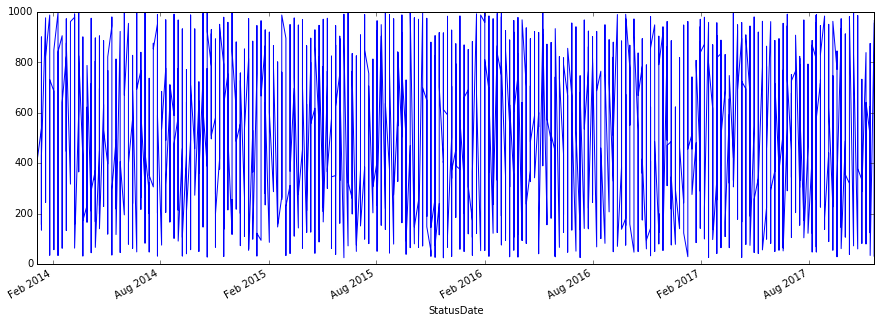

In [23]:
df['CustomerCount'].plot(figsize=(15,5));

If we take a look at the data, we begin to realize that there are multiple values for the same Country, StatusDate, and Product combination. It is possible that this means the data you are working with is dirty/bad/inaccurate, but we will assume otherwise. We can assume this data set is a subset of a bigger data set and if we simply add the values in the ***CustomerCount*** column per Country, StatusDate, and Product we will get the ***Total Customer Count*** per day.  

In [24]:
sortdf = df[df['Countries']=='EU'].sort_index(axis=0)
sortdf.head(10)

,Countries,Product,CustomerCount
StatusDate,,,
2014-01-06,EU,Symcodin,877
2014-01-13,EU,Apoxin,634
2014-01-13,EU,Apoxin,156
2014-01-13,EU,Lipsorol,237
2014-01-13,EU,Apoxin,135
2014-01-20,EU,Lipsorol,932
2014-01-20,EU,Symcodin,577
2014-01-20,EU,Lipsorol,977
2014-01-20,EU,Symcodin,589


<hr style="height:3px;border:none;color:#333;background-color:#333;" />
<hr style="height:3px;border:none;color:#333;background-color:#333;" />

## We want to learn about sales performance in time

Our task is now to create a new dataframe that compresses the data so we have daily customer counts per Country and StatusDate.
To accomplish this we will use the dataframe's functions ***groupby*** and ***sum()***.

### First :
we have to use **reset_index** . If we did not, we would not have been able to group by both the Countries and the StatusDate since the groupby function expects only columns as inputs. The **reset_index** function will bring the index ***StatusDate*** back to a column in the dataframe. 

In [25]:
# Reset Index
df_reset = df.reset_index()


In [26]:
df_reset

,StatusDate,Countries,Product,CustomerCount
0,2014-01-06,EU,Symcodin,877
1,2014-01-13,NGA,Lipsorol,901
2,2014-01-20,AUS,Apoxin,749
3,2014-01-27,EU,Apoxin,111
4,2014-02-03,EU,Apoxin,300
5,2014-02-10,EU,Lipsorol,706
6,2014-02-17,PHL,Lipsorol,347
7,2014-02-24,EU,Apoxin,143
8,2014-03-03,EU,Symcodin,833
9,2014-03-10,BRA,Lipsorol,992


In [27]:
df_reset[df_reset['Countries']=='AUS'].sort_values(by=['StatusDate'])

,StatusDate,Countries,Product,CustomerCount
812,2014-01-06,AUS,Apoxin,691
1827,2014-01-06,AUS,Symcodin,833
204,2014-01-13,AUS,Symcodin,355
2,2014-01-20,AUS,Apoxin,749
1424,2014-01-27,AUS,Lipsorol,369
1019,2014-02-03,AUS,Apoxin,850
1425,2014-02-03,AUS,Lipsorol,444
1426,2014-02-10,AUS,Symcodin,228
1224,2014-02-17,AUS,Lipsorol,556
209,2014-02-17,AUS,Lipsorol,820


<hr style="height:3px;border:none;color:#333;background-color:#333;" />

## Lets also focus on one Product 
We want to check how is our *new drug* **Lipsorol** performing. 
* Take only ***Product == 'Lipsorol'***

In [28]:
lipsorol_data = df_reset[df_reset['Product']=="Lipsorol"]
lipsorol_data.head()

,StatusDate,Countries,Product,CustomerCount
1,2014-01-13,NGA,Lipsorol,901
5,2014-02-10,EU,Lipsorol,706
6,2014-02-17,PHL,Lipsorol,347
9,2014-03-10,BRA,Lipsorol,992
11,2014-03-24,JPN,Lipsorol,32


In [29]:
#Lets Now delete Product Column from this DataFrame as we only have 1 Product
del lipsorol_data['Product']
lipsorol_data.head()

,StatusDate,Countries,CustomerCount
1,2014-01-13,NGA,901
5,2014-02-10,EU,706
6,2014-02-17,PHL,347
9,2014-03-10,BRA,992
11,2014-03-24,JPN,32


In [30]:
lipsorol_data

,StatusDate,Countries,CustomerCount
1,2014-01-13,NGA,901
5,2014-02-10,EU,706
6,2014-02-17,PHL,347
9,2014-03-10,BRA,992
11,2014-03-24,JPN,32
17,2014-05-05,JPN,309
20,2014-05-26,NGA,46
22,2014-06-09,AUS,737
24,2014-06-23,EU,997
26,2014-07-07,JPN,723


### We group the data now
The ***Countries*** and ***StatusDate*** columns are automatically placed in the index of the ***Daily*** dataframe. You can think of the ***index*** as the primary key of a database table but without the constraint of having unique values. Columns in the index as you will see allow us to easily select, plot, and perform calculations on the data.  

In [31]:
# Group by State and StatusDate
Daily = lipsorol_data.groupby(['Countries','StatusDate']).sum()

Daily.head()

CustomerCount
Countries StatusDate               
AUS       2014-01-27            369
          2014-02-03            444
          2014-02-17           1376
          2014-03-03            938
          2014-03-24            378

In [32]:
Daily

CustomerCount
Countries StatusDate               
AUS       2014-01-27            369
          2014-02-03            444
          2014-02-17           1376
          2014-03-03            938
          2014-03-24            378
          2014-04-21            319
          2014-06-09            737
          2014-06-16            589
          2014-08-25            976
          2014-09-22            125
          2014-09-29            326
          2014-10-13            151
          2014-10-27            914
          2014-11-10            626
          2014-11-24            493
          2014-12-08            611
          2014-12-15            395
          2015-02-09            454
          2015-04-27            823
          2015-05-25            946
          2015-06-01            836
          2015-07-13            990
          2015-07-27            307
          2015-08-03            688
          2015-10-12            169
          2015-10-19            100
          2015-10-26            575
          2015-12-14            794
          2015-12-21            194
          2015-12-28            661
...                             ...
PHL       2015-03-16           1129
          2015-06-01            575
          2015-06-29             50
          2015-07-20            500
          2015-08-10            494
          2015-09-07            841
          2015-11-30            202
          2015-12-07            788
          2015-12-21             59
          2016-02-29            981
          2016-03-14            660
          2016-03-21            966
          2016-04-11             82
          2016-05-09            909
          2016-05-16            340
          2016-06-27            682
          2016-08-01            273
          2016-08-15            631
          2016-09-26            181
          2016-10-17             50
          2016-11-14            397
          2017-02-13            492
          2017-02-27            669
          2017-05-01            906
          2017-05-22            227
          2017-05-29           1339
          2017-06-05            370
          2017-07-03            105
          2017-07-24            513
          2017-11-06            839

[541 rows x 1 columns]

In [33]:
# What is the index of the dataframe
Daily.index

MultiIndex(levels=[[u'AUS', u'BRA', u'ECU', u'EU', u'JPN', u'NGA', u'PHL'], [2014-01-06 00:00:00, 2014-01-13 00:00:00, 2014-01-20 00:00:00, 2014-01-27 00:00:00, 2014-02-03 00:00:00, 2014-02-10 00:00:00, 2014-02-17 00:00:00, 2014-02-24 00:00:00, 2014-03-03 00:00:00, 2014-03-10 00:00:00, 2014-03-17 00:00:00, 2014-03-24 00:00:00, 2014-03-31 00:00:00, 2014-04-07 00:00:00, 2014-04-14 00:00:00, 2014-04-21 00:00:00, 2014-04-28 00:00:00, 2014-05-05 00:00:00, 2014-05-19 00:00:00, 2014-05-26 00:00:00, 2014-06-02 00:00:00, 2014-06-09 00:00:00, 2014-06-16 00:00:00, 2014-06-23 00:00:00, 2014-06-30 00:00:00, 2014-07-07 00:00:00, 2014-07-14 00:00:00, 2014-07-21 00:00:00, 2014-07-28 00:00:00, 2014-08-04 00:00:00, 2014-08-11 00:00:00, 2014-08-25 00:00:00, 2014-09-01 00:00:00, 2014-09-08 00:00:00, 2014-09-15 00:00:00, 2014-09-22 00:00:00, 2014-09-29 00:00:00, 2014-10-06 00:00:00, 2014-10-13 00:00:00, 2014-10-20 00:00:00, 2014-10-27 00:00:00, 2014-11-03 00:00:00, 2014-11-10 00:00:00, 2014-11-17 00:00:00,

In [34]:
# Select the State index
Daily.index.levels[0]

Index([u'AUS', u'BRA', u'ECU', u'EU', u'JPN', u'NGA', u'PHL'], dtype='object', name=u'Countries')

In [35]:
# Select the StatusDate index
Daily.index.levels[1]

DatetimeIndex(['2014-01-06', '2014-01-13', '2014-01-20', '2014-01-27',
               '2014-02-03', '2014-02-10', '2014-02-17', '2014-02-24',
               '2014-03-03', '2014-03-10',
               ...
               '2017-09-18', '2017-09-25', '2017-10-02', '2017-10-09',
               '2017-10-16', '2017-10-23', '2017-10-30', '2017-11-06',
               '2017-11-13', '2017-11-20'],
              dtype='datetime64[ns]', name=u'StatusDate', length=200, freq=None)

<hr style="height:3px;border:none;color:#333;background-color:#333;" />

Lets now plot the data per Country.  

As you can see by breaking the graph up by the ***Coutries*** column we have a much clearer picture on how the data looks like. Can you spot any outliers?

In [57]:
Daily.index.levels[0]

Index([u'AUS', u'BRA', u'ECU', u'EU', u'JPN', u'NGA', u'PHL'], dtype='object', name=u'Countries')

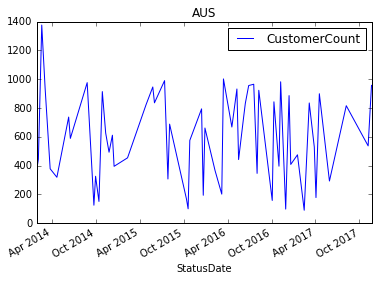

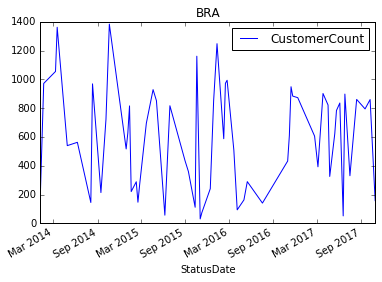

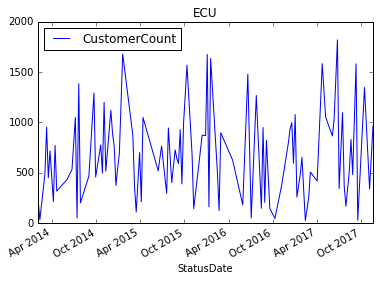

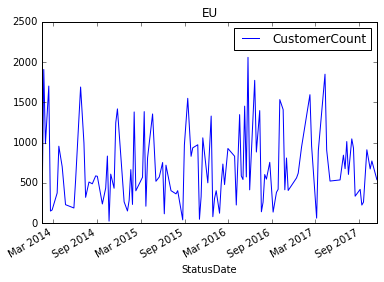

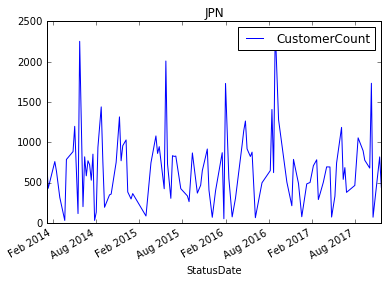

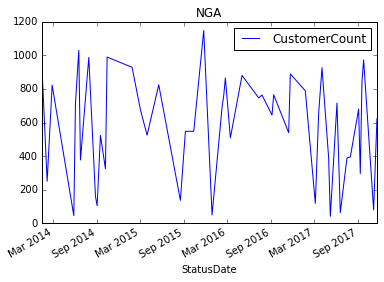

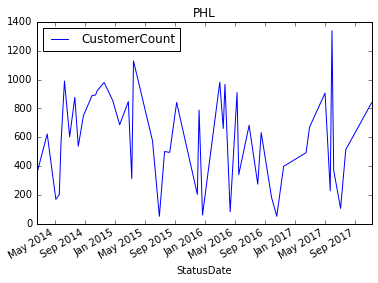

In [37]:
Daily.loc['AUS'].plot(title='AUS')
Daily.loc['BRA'].plot(title='BRA')
Daily.loc['ECU'].plot(title='ECU')
Daily.loc['EU'].plot(title='EU')
Daily.loc['JPN'].plot(title='JPN')
Daily.loc['NGA'].plot(title='NGA')
Daily.loc['PHL'].plot(title='PHL')

We can also just plot the data on a period of time or specific date, like ***2017:01 to 2017:05*** or ***2016***. We can now clearly see that the data for these Countries is all over the place. since the data consist of weekly customer counts, the variability of the data seems suspect. For this tutorial we will assume bad data and proceed. 

In [38]:
Daily.loc['AUS']['2017-01':'2017-05']

,CustomerCount
StatusDate,
2017-01-16,475
2017-02-13,90
2017-03-06,835
2017-03-27,529
2017-04-03,178
2017-04-17,899
2017-05-29,293


In [39]:
Daily.loc['AUS']['2016':'2016']

,CustomerCount
StatusDate,
2016-02-08,366
2016-03-07,202
2016-03-14,1002
2016-04-18,668
2016-05-09,932
2016-05-16,442
2016-06-06,737
2016-06-13,832
2016-06-27,956


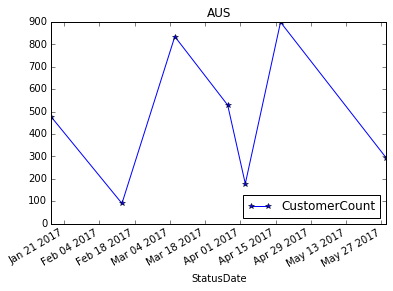

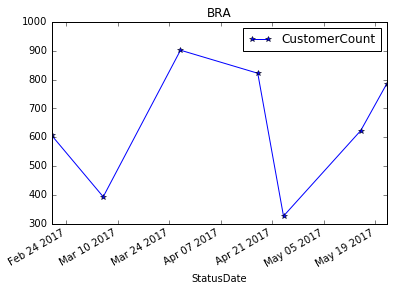

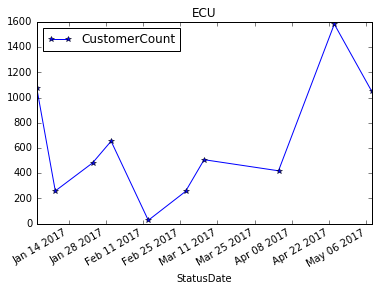

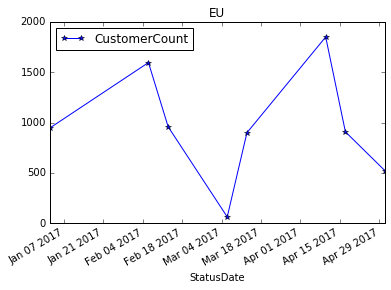

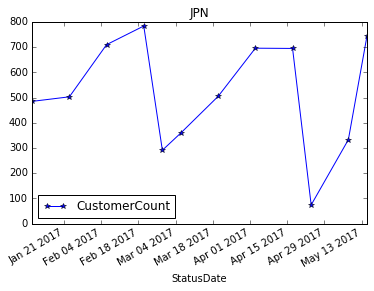

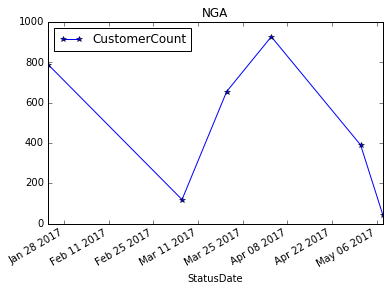

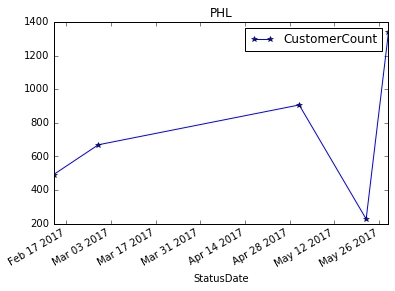

In [40]:
Daily.loc['AUS']['2017-01':'2017-05'].plot(title='AUS',marker='*')
Daily.loc['BRA']['2017-01':'2017-05'].plot(title='BRA',marker='*')
Daily.loc['ECU']['2017-01':'2017-05'].plot(title='ECU',marker='*')
Daily.loc['EU']['2017-01':'2017-05'].plot(title='EU',marker='*')
Daily.loc['JPN']['2017-01':'2017-05'].plot(title='JPN',marker='*')
Daily.loc['NGA']['2017-01':'2017-05'].plot(title='NGA',marker='*')
Daily.loc['PHL']['2017-01':'2017-05'].plot(title='PHL',marker='*')

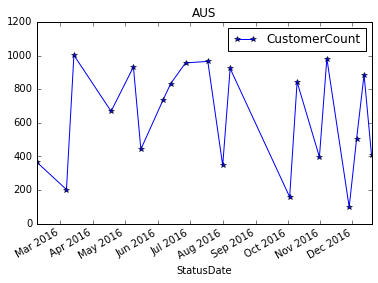

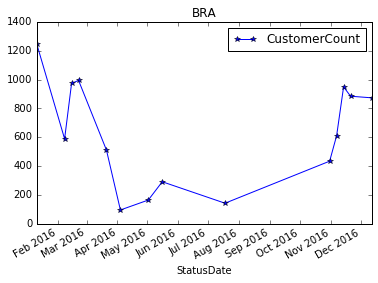

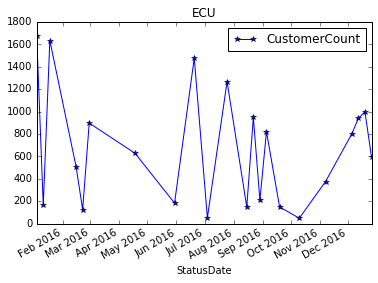

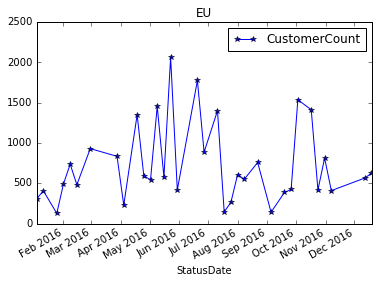

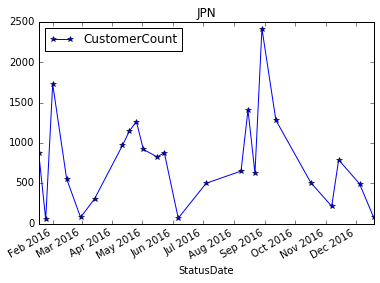

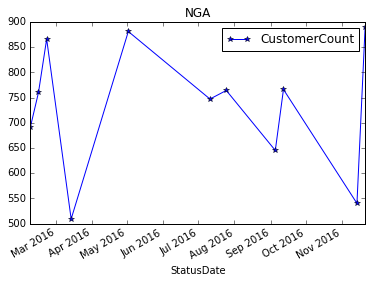

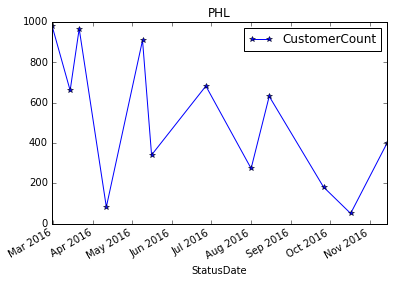

In [41]:
Daily.loc['AUS']['2016':'2016'].plot(title='AUS',marker='*')
Daily.loc['BRA']['2016':'2016'].plot(title='BRA',marker='*')
Daily.loc['ECU']['2016':'2016'].plot(title='ECU',marker='*')
Daily.loc['EU']['2016':'2016'].plot(title='EU',marker='*')
Daily.loc['JPN']['2016':'2016'].plot(title='JPN',marker='*')
Daily.loc['NGA']['2016':'2016'].plot(title='NGA',marker='*')
Daily.loc['PHL']['2016':'2016'].plot(title='PHL',marker='*')

We will assume that per month the customer count should remain relatively steady. Any data outside a specific range in that month will be removed from the data set. The final result should have smooth graphs with no spikes.  

***CountryYearMonth*** - Here we group by Countries, Year of StatusDate, and Month of StatusDate.  
***Daily['Outlier']*** - A boolean (True or False) value letting us know if the value in the CustomerCount column is ouside the acceptable range.  

We will be using the attribute ***transform*** instead of ***apply***. The reason is that transform will keep the shape(# of rows and columns) of the dataframe the same and apply will not. By looking at the previous graphs, we can realize they are not resembling a gaussian distribution, this means we cannot use summary statistics like the mean and stDev. We use percentiles instead. Note that we run the risk of eliminating good data.

In [42]:
# Calculate Outliers
CountryYearMonth = Daily.groupby([Daily.index.get_level_values(0), Daily.index.get_level_values(1).year, Daily.index.get_level_values(1).month])
Daily['Lower'] = StateYearMonth['CustomerCount'].transform( lambda x: x.quantile(q=.25) - (1.5*x.quantile(q=.75)-x.quantile(q=.25)) )
Daily['Upper'] = StateYearMonth['CustomerCount'].transform( lambda x: x.quantile(q=.75) + (1.5*x.quantile(q=.75)-x.quantile(q=.25)) )
Daily['Outlier'] = (Daily['CustomerCount'] < Daily['Lower']) | (Daily['CustomerCount'] > Daily['Upper']) 

# Remove Outliers
Daily = Daily[Daily['Outlier'] == False]

In [66]:
StateYearMonth.sum()

CustomerCount    Lower    Upper  Outlier
Countries StatusDate StatusDate                                          
AUS       2014       1                     369   184.50   553.50    False
                     2                    1820  -721.00  4361.00    False
                     3                    1316  -322.00  2954.00    False
                     4                     319   159.50   478.50    False
                     6                    1326   404.00  2248.00    False
                     8                     976   488.00  1464.00    False
                     9                     451  -126.25  1028.25    False
                     10                   1065  -802.75  2932.75    False
                     11                   1119   326.75  1911.25    False
                     12                   1006   125.00  1887.00    False
          2015       2                     454   227.00   681.00    False
                     4                     823   411.50  1234.50    False
                     5                     946   473.00  1419.00    False
                     6                     836   418.00  1254.00    False
                     7                    1297  -546.75  3140.75    False
                     8                     688   344.00  1032.00    False
                     10                    844  -867.00  2386.50    False
                     12                   1649  -708.75  4173.75    False
          2016       2                     366   183.00   549.00    False
                     3                    1204  -798.00  3206.00    False
                     4                     668   334.00  1002.00    False
                     5                    1374  -170.50  2918.50    False
                     6                    2525   684.00  4351.50    False
                     7                     965   482.50  1447.50    False
                     8                    1269  -375.25  2913.25    False
                     10                   1397 -1125.75  3815.25    False
                     11                   1080 -1007.00  3167.00    False
                     12                   1799  -390.75  3846.75    False
          2017       1                     475   237.50   712.50    False
                     2                      90    45.00   135.00    False
...                                        ...      ...      ...      ...
PHL       2014       6                    1591   118.25  3063.75    False
                     7                     876   438.00  1314.00    False
                     8                    1286   272.00  2300.00    False
                     9                     889   444.50  1333.50    False
                     10                   1815   853.25  2776.75    False
                     11                    979   489.50  1468.50    False
                     12                    853   426.50  1279.50    False
          2015       1                     686   343.00  1029.00    False
                     2                     847   423.50  1270.50    False
                     3                    1441  -709.25  3591.25    False
                     6                     625  -606.25  1856.25    False
                     7                     500   250.00   750.00    False
                     8                     494   247.00   741.00    False
                     9                     841   420.50  1261.50    False
                     11                    202   101.00   303.00    False
                     12                    847  -852.25  2546.25    False
          2016       2                     981   490.50  1471.50    False
                     3                    1626   277.50  2974.50    False
                     4                      82    41.00   123.00    False
                     5                    1249  -371.25  2869.25    False
                     6                     682   341.00  1023.00    False
                     8               

In [59]:
Daily.index.levels[0]

Index([u'AUS', u'BRA', u'ECU', u'EU', u'JPN', u'NGA', u'PHL'], dtype='object', name=u'Countries')

In [64]:
Daily.index.get_level_values(1)

DatetimeIndex(['2014-01-27', '2014-02-03', '2014-02-17', '2014-03-03',
               '2014-03-24', '2014-04-21', '2014-06-09', '2014-06-16',
               '2014-08-25', '2014-09-22',
               ...
               '2016-11-14', '2017-02-13', '2017-02-27', '2017-05-01',
               '2017-05-22', '2017-05-29', '2017-06-05', '2017-07-03',
               '2017-07-24', '2017-11-06'],
              dtype='datetime64[ns]', name=u'StatusDate', length=540, freq=None)

In [54]:
[Daily.index.get_level_values(0), Daily.index.get_level_values(1).year, Daily.index.get_level_values(1).month]

[Index([u'AUS', u'AUS', u'AUS', u'AUS', u'AUS', u'AUS', u'AUS', u'AUS', u'AUS',
        u'AUS',
        ...
        u'PHL', u'PHL', u'PHL', u'PHL', u'PHL', u'PHL', u'PHL', u'PHL', u'PHL',
        u'PHL'],
       dtype='object', name=u'Countries', length=540),
 Int64Index([2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014,
             ...
             2016, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017],
            dtype='int64', name=u'StatusDate', length=540),
 Int64Index([ 1,  2,  2,  3,  3,  4,  6,  6,  8,  9,
             ...
             11,  2,  2,  5,  5,  5,  6,  7,  7, 11],
            dtype='int64', name=u'StatusDate', length=540)]

The dataframe named ***Daily*** will hold customer counts that have been aggregated per day. The original data (df) has multiple records per day.  We are left with a data set that is indexed by both the state and the StatusDate. The Outlier column should be equal to ***False*** signifying that the record is not an outlier.

In [55]:
Daily

CustomerCount    Lower     Upper  Outlier
Countries StatusDate                                           
AUS       2014-01-27            369  184.500   553.500    False
          2014-02-03            444 -360.500  2180.500    False
          2014-02-17           1376 -360.500  2180.500    False
          2014-03-03            938 -161.000  1477.000    False
          2014-03-24            378 -161.000  1477.000    False
          2014-04-21            319  159.500   478.500    False
          2014-06-09            737  202.000  1124.000    False
          2014-06-16            589  202.000  1124.000    False
          2014-08-25            976  488.000  1464.000    False
          2014-09-22            125  -63.125   514.125    False
          2014-09-29            326  -63.125   514.125    False
          2014-10-13            151 -401.375  1466.375    False
          2014-10-27            914 -401.375  1466.375    False
          2014-11-10            626  163.375   955.625    False
          2014-11-24            493  163.375   955.625    False
          2014-12-08            611   62.500   943.500    False
          2014-12-15            395   62.500   943.500    False
          2015-02-09            454  227.000   681.000    False
          2015-04-27            823  411.500  1234.500    False
          2015-05-25            946  473.000  1419.000    False
          2015-06-01            836  418.000  1254.000    False
          2015-07-13            990 -273.375  1570.375    False
          2015-07-27            307 -273.375  1570.375    False
          2015-08-03            688  344.000  1032.000    False
          2015-10-12            169 -289.000   795.500    False
          2015-10-19            100 -289.000   795.500    False
          2015-10-26            575 -289.000   795.500    False
          2015-12-14            794 -236.250  1391.250    False
          2015-12-21            194 -236.250  1391.250    False
          2015-12-28            661 -236.250  1391.250    False
...                             ...      ...       ...      ...
PHL       2015-03-16           1129 -354.625  1795.625    False
          2015-06-01            575 -303.125   928.125    False
          2015-06-29             50 -303.125   928.125    False
          2015-07-20            500  250.000   750.000    False
          2015-08-10            494  247.000   741.000    False
          2015-09-07            841  420.500  1261.500    False
          2015-11-30            202  101.000   303.000    False
          2015-12-07            788 -426.125  1273.125    False
          2015-12-21             59 -426.125  1273.125    False
          2016-02-29            981  490.500  1471.500    False
          2016-03-14            660  138.750  1487.250    False
          2016-03-21            966  138.750  1487.250    False
          2016-04-11             82   41.000   123.000    False
          2016-05-09            909 -185.625  1434.625    False
          2016-05-16            340 -185.625  1434.625    False
          2016-06-27            682  341.000  1023.000    False
          2016-08-01            273  -87.250   991.250    False
          2016-08-15            631  -87.250   991.250    False
          2016-09-26            181   90.500   271.500    False
          2016-10-17             50   25.000    75.000    False
          2016-11-14            397  198.500   595.500    False
          2017-02-13            492  135.375  1025.625    False
          2017-02-27            669  135.375  1025.625    False
          2017-05-01            906 -550.750  2239.750    False
          2017-05-22            227 -550.750  2239.750    False
          2017-05-29           1339 -550.750  2239.750    False
          2017-06-05            370  185.000   555.000    False
          2017-07-03            105 -202.500   820.500    False
          2017-07-24            513 -202.500   820.500    False
          2017-11-06            839  419.500  1258.500

In [43]:
Daily.head()

CustomerCount  Lower   Upper  Outlier
Countries StatusDate                                       
AUS       2014-01-27            369  184.5   553.5    False
          2014-02-03            444 -360.5  2180.5    False
          2014-02-17           1376 -360.5  2180.5    False
          2014-03-03            938 -161.0  1477.0    False
          2014-03-24            378 -161.0  1477.0    False

We create a separate dataframe named ***ALL*** which groups the Daily dataframe by StatusDate. We are essentially getting rid of the ***State*** column. The ***Max*** column represents the maximum customer count per month. The ***Max*** column is used to smooth out the graph.

In [44]:
# Combine all markets

# Get the max customer count by Date
ALL = pd.DataFrame(Daily['CustomerCount'].groupby(Daily.index.get_level_values(1)).sum())
ALL.columns = ['CustomerCount'] # rename column

# Group by Year and Month
YearMonth = ALL.groupby([lambda x: x.year, lambda x: x.month])

# What is the max customer count per Year and Month
ALL['Max'] = YearMonth['CustomerCount'].transform(lambda x: x.max())
ALL.head()

,CustomerCount,Max
StatusDate,,
2014-01-06,1003,2881
2014-01-13,1568,2881
2014-01-20,2881,2881
2014-01-27,1357,2881
2014-02-03,924,2517


As you can see from the ***ALL*** dataframe above, in the month of January 2009, the maximum customer count was 901. If we had used ***apply***, we would have got a dataframe with (Year and Month) as the index and just the *Max* column with the value of 901. 

----------------------------------  
There is also an interest to gauge if the current customer counts were reaching certain goals the company had established. The task here is to visually show if the current customer counts are meeting the goals listed below. We will call the goals ***BHAG*** (Big Hairy Annual Goal).  

* 12/31/2011 - 1,000 customers  
* 12/31/2012 - 2,000 customers  
* 12/31/2013 - 3,000 customers  

We will be using the **date_range** function to create our dates.  

***Definition:*** date_range(start=None, end=None, periods=None, freq='D', tz=None, normalize=False, name=None, closed=None)  
***Docstring:*** Return a fixed frequency datetime index, with day (calendar) as the default frequency  

By choosing the frequency to be ***A*** or annual we will be able to get the three target dates from above.

In [ ]:
pd.date_range?

In [45]:
# Create the BHAG dataframe
data = [1000,2000,3000]
idx = pd.date_range(start='12/31/2011', end='12/31/2013', freq='A')
BHAG = pd.DataFrame(data, index=idx, columns=['BHAG'])
BHAG

,BHAG
2011-12-31,1000
2012-12-31,2000
2013-12-31,3000


Combining dataframes as we have learned in previous lesson is made simple using the ***concat*** function. Remember when we choose ***axis = 0*** we are appending row wise.

In [46]:
# Combine the BHAG and the ALL data set 
combined = pd.concat([ALL,BHAG], axis=0)
combined = combined.sort_index(axis=0)
combined.tail()

,BHAG,CustomerCount,Max
2017-10-23,NaN,774.0,2593.0
2017-10-30,NaN,158.0,2593.0
2017-11-06,NaN,1795.0,2984.0
2017-11-13,NaN,1362.0,2984.0
2017-11-20,NaN,2984.0,2984.0


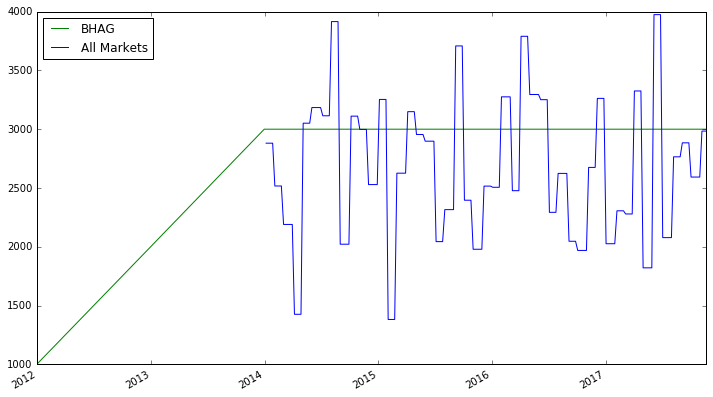

In [47]:
fig, axes = plt.subplots(figsize=(12, 7))

combined['BHAG'].fillna(method='pad').plot(color='green', label='BHAG')
combined['Max'].plot(color='blue', label='All Markets')
plt.legend(loc='best');

There was also a need to forecast next year's customer count and we can do this in a couple of simple steps. We will first group the ***combined*** dataframe by ***Year*** and place the maximum customer count for that year. This will give us one row per Year.   

In [48]:
# Group by Year and then get the max value per year
Year = combined.groupby(lambda x: x.year).max()
Year

,BHAG,CustomerCount,Max
2011,1000.0,NaN,NaN
2012,2000.0,NaN,NaN
2013,3000.0,NaN,NaN
2014,NaN,3915.0,3915.0
2015,NaN,3708.0,3708.0
2016,NaN,3790.0,3790.0
2017,NaN,3974.0,3974.0


In [49]:
# Add a column representing the percent change per year
Year['YR_PCT_Change'] = Year['Max'].pct_change(periods=1)
Year

,BHAG,CustomerCount,Max,YR_PCT_Change
2011,1000.0,NaN,NaN,NaN
2012,2000.0,NaN,NaN,NaN
2013,3000.0,NaN,NaN,NaN
2014,NaN,3915.0,3915.0,NaN
2015,NaN,3708.0,3708.0,-0.052874
2016,NaN,3790.0,3790.0,0.022114
2017,NaN,3974.0,3974.0,0.048549


To get next year's end customer count we will assume our current growth rate remains constant. We then will increase this years customer count by that amount and that will be our forecast for next year. 

In [50]:
(1 + Year.ix[2012,'YR_PCT_Change']) * Year.loc[2012,'Max']

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  if __name__ == '__main__':


nan

# Present Data  

Create individual Graphs per State.  

KeyError: 'the label [FL] is not in the [index]'

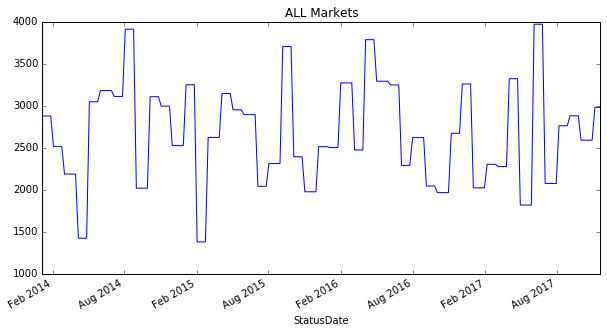

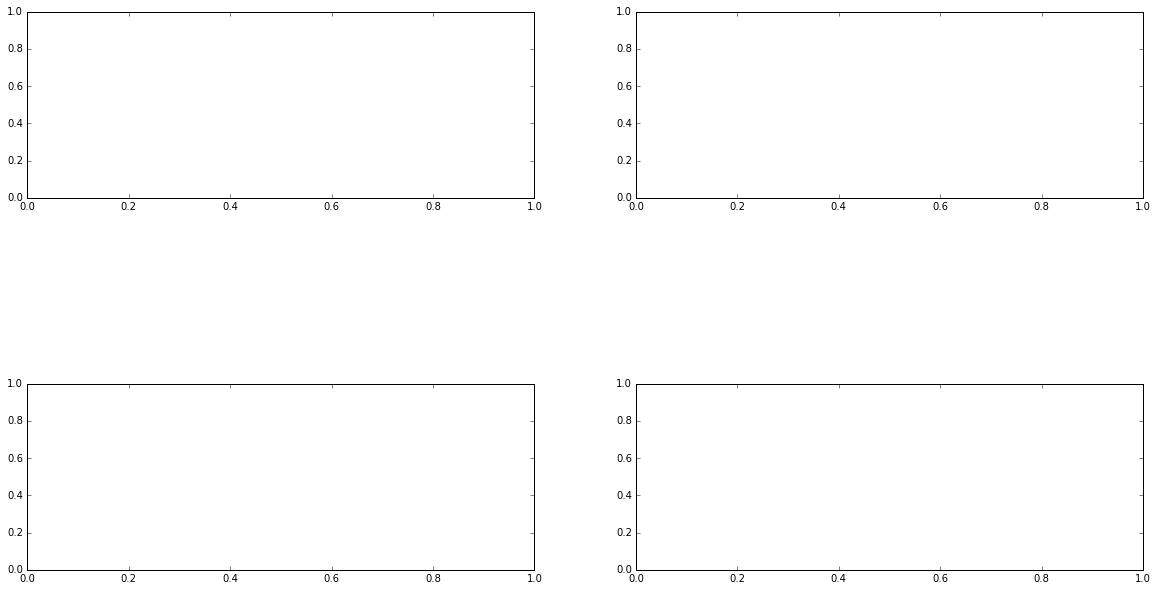

In [51]:
# First Graph
ALL['Max'].plot(figsize=(10, 5));plt.title('ALL Markets')

# Last four Graphs
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
fig.subplots_adjust(hspace=1.0) ## Create space between plots

Daily.loc['FL']['CustomerCount']['2012':].fillna(method='pad').plot(ax=axes[0,0])
Daily.loc['GA']['CustomerCount']['2012':].fillna(method='pad').plot(ax=axes[0,1]) 
Daily.loc['TX']['CustomerCount']['2012':].fillna(method='pad').plot(ax=axes[1,0]) 
Daily.loc['NY']['CustomerCount']['2012':].fillna(method='pad').plot(ax=axes[1,1]) 

# Add titles
axes[0,0].set_title('Florida')
axes[0,1].set_title('Georgia')
axes[1,0].set_title('Texas')
axes[1,1].set_title('North East');